In [36]:
import numpy as np
import os
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

ImportError: cannot import name cross_validate

In [116]:
spam = np.genfromtxt('practice/spam.data', delimiter=' ')
x, testx, y, testy = train_test_split(spam[:,:-1], spam[:,-1], test_size=227, random_state=123)
estimator = DecisionTreeClassifier(min_impurity_split=0.)
estimator.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_impurity_split=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
print(max(getdepth(estimator)))

28


In [106]:
#yhat=estimator.predict(x)
sum(y==1)/float(len(y))
x[:,51].sort()
x[:, 51]

array([  0.   ,   0.   ,   0.   , ...,   9.575,  19.131,  32.478])

In [137]:
# Best cut according to sklearn implementation
best_cut_51 = estimator.tree_.threshold[0]
left_idx = np.where(x[:, 51]<=best_cut_51)[0]
right_idx = np.where(x[:, 51]>best_cut_51)[0]

In [152]:
#print(left_idx.shape)
#print(y[left_idx].sum())
#print(y[right_idx].sum())
sum(y==1)
def mygini(lidx, ridx):
    gini = 1. - (float(lidx.shape[0])/(lidx.shape[0]+ridx.shape[0]))**2 - (float(ridx.shape[0])/(ridx.shape[0]+lidx.shape[0]))**2
    return gini

print(mygini(left_idx, right_idx))
#print(np.where(y==0)[0].shape)
print(mygini(np.where(y==0)[0], np.where(y==1)[0]))
#print(float(1. - (2652./4374.)**2 - (1722./4374)**2))

0.487986436876
0.477396361967


In [119]:
print(estimator.tree_.threshold)                     

[  7.95000046e-02   4.50000018e-02   1.64000005e-01   1.14999995e-01
   9.99999978e-03   1.55000001e-01   7.10500002e+00   1.19999997e-01
   1.25000000e+01   2.78000021e+00   8.49499989e+00   1.04400005e+01
   9.20000017e-01   7.25000024e-01   7.41499996e+00   1.82999992e+00
   1.26900005e+00   1.26250005e+00   3.60000000e+01   6.50000000e+00
  -2.00000000e+00   7.50000000e+00   1.72000003e+00   1.50000000e+00
   1.55999994e+00   2.63000011e+00   1.08500004e+00   3.12500000e+00
  -2.00000000e+00  -2.00000000e+00  -2.00000000e+00  -2.00000000e+00
  -2.00000000e+00  -2.00000000e+00  -2.00000000e+00  -2.00000000e+00
   1.05850005e+00  -2.00000000e+00  -2.00000000e+00  -2.00000000e+00
  -2.00000000e+00   2.02750015e+00  -2.00000000e+00  -2.00000000e+00
   4.00000000e+00  -2.00000000e+00  -2.00000000e+00   8.09999943e-01
   3.48749995e+00   7.35000014e-01   7.35000014e-01  -2.00000000e+00
  -2.00000000e+00   1.89999998e+00   5.99999987e-02   2.34999992e-02
   1.05000000e+01   1.98000002e+00

In [35]:
def getdepth(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold
    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    return node_depth


In [98]:
estimator.tree_.impurity

array([ 0.47739636,  0.26056581,  0.18474821,  0.14903384,  0.11032767,
        0.0952211 ,  0.08821398,  0.08648885,  0.12694028,  0.06365144,
        0.06172916,  0.05979855,  0.05785957,  0.05597009,  0.02119898,
        0.01779216,  0.01438773,  0.03291259,  0.01673521,  0.00877176,
        0.        ,  0.02940521,  0.09070295,  0.15277778,  0.27777778,
        0.375     ,  0.44444444,  0.5       ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.18      ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.32      ,  0.        ,  0.        ,  0.44444444,
        0.        ,  0.        ,  0.10520021,  0.09644256,  0.0918572 ,
        0.5       ,  0.        ,  0.        ,  0.08744487,  0.07232116,
        0.11361817,  0.1723356 ,  0.14090779,  0.29336735,  0.2112    ,
        0.35502959,  0.        ,  0.375     ,  0.        ,  0.        ,
        0.        ,  0.44444444,  0.        ,  0.        ,  0.08

In [92]:
acc_ = []
depth_ = []
#for j in reversed([0., 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1]):
for j in np.arange(0.0, 0.6, 0.02):
    clf = DecisionTreeClassifier(min_impurity_split=j)
    acc = cross_val_score(clf, x, y, cv=10)
    clf.fit(x,y)
    depth_.append(max(getdepth(clf)))
    acc_.append(1-acc.mean())

In [85]:
plt.scatter(np.arange(0.05, 1, 0.05), acc_)

In [93]:
plt.scatter(depth_, np.arange(0.0, 0.6, 0.02))

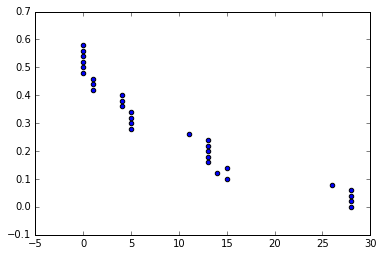

In [94]:
plt.show()

In [117]:
dot_data = tree.export_graphviz(estimator, out_file=None) 
graph = graphviz.Source(dot_data)

In [118]:
graph.render('spam')

'spam.pdf'

In [43]:
print(max(getdepth(estimator)))

28
